### Visualizer of result

To measure the performance of surface code decoder, there are two aspects:
1. Case of result
2. Error threshold
3. Time complexity

So does MWPM decoder. In this part we will try to visualize the decode effect of our implement together with decoder from  `PyMatch` lib.

#### 1. Result Analysis

In [173]:
# read the result from the file and print the result
import numpy as np

# error_x, error_z, syndrome_x, syndrome_z,sizeX,sizeY = read_test_file('test_file.npz')
def read_test_file(filename):
    file_path = "../code/data/input/" + filename
    data = np.load(file_path, allow_pickle=True)
    file_content = data['arr_0']
    return file_content

# consume_time, correct_x, correct_z = read_result_file('result_file.npz')
def read_result_file(filename):
    file_path = "../code/data/output/" + filename
    data = np.load(file_path, allow_pickle=True)
    file_content = data['arr_0']
    return file_content

In [174]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches

def commonconfig(sizeX,sizeY):
    plt.figure(figsize=(4, 4))
    plt.xlim(-0.5, sizeX-0.5)
    plt.ylim(-0.5, sizeY-0.5)
    #add a black point at every vertex of grid
    for y in range(sizeY):
        for x in range(sizeX):
            plt.plot(x, y, 'ko', markersize=3)  # Black dot for vertex
    ax = plt.gca()
    # Enable the grid
    ax.grid(True, linewidth=1)
    ax.set_xticks(np.arange(sizeX))
    ax.set_yticks(np.arange(sizeY))
    # Hide the tick labels on both axes while keeping the grid
    ax.tick_params(axis='x', labelbottom=False)
    ax.tick_params(axis='y', labelleft=False)
    ax.set_aspect('equal', adjustable='box')  # Set aspect ratio

def plot_lattice(test_content,sizeX,sizeY,onlyErrorZ=0,plt=plt):
    commonconfig(sizeX,sizeY)
    colorTable = ['k-','b-','r-','g-']
    for y in range(sizeY*2):
        for x in range(sizeX):
            result = test_content["error_x"][y,x] + test_content["error_z"][y,x]*2
            if(onlyErrorZ == 1):
                result = test_content["error_z"][y,x]*2
            if(result == 0):
                continue
            ypos = y//2
            if(y%2 == 0):
                #it's a vertical line
                #when reach vertical boundary, draw a line that 1/2 at start and 1/2 at end
                if(y == 0):
                    plt.plot([x, x], [-0.5, 0], colorTable[result], linewidth=2)
                    plt.plot([x, x], [sizeY-1,sizeY-0.5], colorTable[result], linewidth=2)
                else:
                    plt.plot([x, x], [ypos-1, ypos], colorTable[result], linewidth=2)
            else:
                #it's a horizontal line
                #when reach horizontal boundary, draw a line that 1/2 at start and 1/2 at end
                if(x == 0):
                    plt.plot([-0.5, 0], [ypos, ypos], colorTable[result], linewidth=2)
                    plt.plot([sizeX-1, sizeX-0.5], [ypos, ypos], colorTable[result], linewidth=2)
                else:
                    plt.plot([x-1, x], [ypos, ypos], colorTable[result], linewidth=2)
    plt.show()
    
def plot_syndromes_X(test_content,sizeX,sizeY):
    commonconfig(sizeX,sizeY)
    
    ax = plt.gca()
    for y in range(sizeY):
        for x in range(sizeX):
            if test_content["syndrome_x"][y,x] == 1:
                #X syndrome is a shallow blue rectangle that fill the lattice
                #when hit boundary, draw a rectangle that 1/2 at start and 1/2 at end
                if(x == 0 and y == 0):
                    #draw rectangle on four corner
                    ax.add_patch(patches.Rectangle((-0.5, -0.5), 0.5, 0.5, edgecolor='none', facecolor='lightblue'))
                    ax.add_patch(patches.Rectangle((sizeX-1, -0.5), 0.5, 0.5, edgecolor='none', facecolor='lightblue'))
                    ax.add_patch(patches.Rectangle((-0.5, sizeY-1), 0.5, 0.5, edgecolor='none', facecolor='lightblue'))
                    ax.add_patch(patches.Rectangle((sizeX-1, sizeY-1), 0.5, 0.5, edgecolor='none', facecolor='lightblue'))
                elif(y == 0):
                    ax.add_patch(patches.Rectangle((x-1, -0.5), 1, 0.5, edgecolor='none', facecolor='lightblue'))
                    ax.add_patch(patches.Rectangle((x-1, sizeY-1), 1, 0.5, edgecolor='none', facecolor='lightblue'))
                elif(x == 0):
                    ax.add_patch(patches.Rectangle((-0.5, y-1), 0.5, 1, edgecolor='none', facecolor='lightblue'))
                    ax.add_patch(patches.Rectangle((sizeX-1, y-1), 0.5, 1, edgecolor='none', facecolor='lightblue'))
                else:
                    ax.add_patch(patches.Rectangle((x-1, y-1), 1, 1, edgecolor='none', facecolor='lightblue'))
                
    plt.show()

def plot_syndromes_Z(test_content,sizeX,sizeY,plt=plt):
    commonconfig(sizeX,sizeY)
    for y in range(sizeY):
        for x in range(sizeX):
            if test_content["syndrome_z"][y,x] == 1:
                #Z syndrome is on the vertice, show as a red star point
                plt.plot(x, y, 'r*', markersize=8)  # Red star for Z syndrome on vertex

    plt.show()

def plot_result_Z(test_content,result_content,sizeX,sizeY,plt=plt,visualMatchingAlso=False):
    def plot_one_z(z_content):
        for y in range(sizeY*2):
            for x in range(sizeX):
                if z_content[y,x] == 1:
                    ypos = y//2
                    if(y%2 == 0):
                        #it's a vertical line
                        #when reach vertical boundary, draw a line that 1/2 at start and 1/2 at end
                        if(y == 0):
                            plt.plot([x, x], [-0.5, 0], 'r-', linewidth=2)
                            plt.plot([x, x], [sizeY-1,sizeY-0.5], 'r-', linewidth=2)
                        else:
                            plt.plot([x, x], [ypos-1, ypos], 'r-', linewidth=2)
                    else:
                        #it's a horizontal line
                        #when reach horizontal boundary, draw a line that 1/2 at start and 1/2 at end
                        if(x == 0):
                            plt.plot([-0.5, 0], [ypos, ypos], 'r-', linewidth=2)
                            plt.plot([sizeX-1, sizeX-0.5], [ypos, ypos], 'r-', linewidth=2)
                        else:
                            plt.plot([x-1, x], [ypos, ypos], 'r-', linewidth=2)
    if(visualMatchingAlso):
        commonconfig(sizeX,sizeY)
        for y in range(sizeY):
            for x in range(sizeX):
                if test_content["syndrome_z"][y,x] == 1:
                    #Z syndrome is on the vertice, show as a red star point
                    plt.plot(x, y, 'r*', markersize=8)  # Red star for Z syndrome on vertex
        plot_one_z(result_content["correct_z"])
        plt.show()
    commonconfig(sizeX,sizeY)
    plot_one_z(result_content["correct_z"] ^ test_content["error_z"])
    plt.show()


lattice with error, green-Y, blue-X, red-Z:


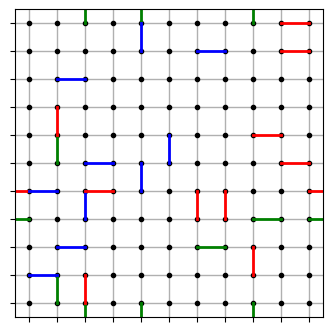

syndrome Z:


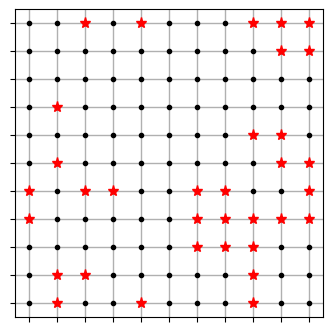

result Z:


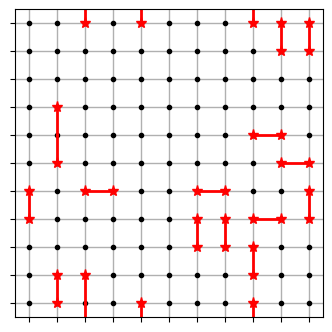

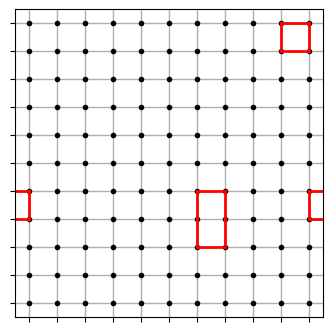

In [175]:
#now try to read from a file and plot the result

test_num = 500
test_batches = 25
testset_list = []
resultset_list = []
for i in range(test_batches):
    testset_list.append(read_test_file("test"+str(i)+".npz"))
    resultset_list.append(read_result_file("result"+str(i)+".npz"))

batch_index = 12
vi = 20
print("lattice with error, green-Y, blue-X, red-Z:")
plot_lattice(testset_list[batch_index][vi],testset_list[batch_index][vi]["sizeX"],testset_list[batch_index][vi]["sizeY"])
# print("syndrome X:")
# plot_syndromes_X(test_list[vi],testset_list[batch_index][vi],testset_list[batch_index][vi])
print("syndrome Z:")
plot_syndromes_Z(testset_list[batch_index][vi],testset_list[batch_index][vi]["sizeX"],testset_list[batch_index][vi]["sizeY"])
print("result Z:")
plot_result_Z(testset_list[batch_index][vi],resultset_list[batch_index][vi],testset_list[batch_index][vi]["sizeX"],testset_list[batch_index][vi]["sizeY"],visualMatchingAlso=True)


#### 2. Error threshold

draw line chat and find out when the logical error rate of larger lattice will upper than the small lattice.

To measure logical error rate, need to calculate the logical state, this can be done easily by parity check.

In [176]:

from copy import deepcopy
# Define logical operator to check for logical errors
def logical_opt(lattice):
    # Check for logical errors by detecting non-trivial loops
    #only check first line of lattice
    horizontal_loop = np.sum(lattice[0], axis=0) % 2
    vertical_loop = np.sum(lattice[:,0][::2], axis=0) % 2
    return np.any(horizontal_loop) or np.any(vertical_loop)

def check_error(error_g,correct_g):
    if(logical_opt(error_g^correct_g)==0):
        return False
    return True

In [179]:
p_x = np.arange(0.02,0.02+0.032,0.032/25,dtype=float)
pymatch_errrate_5 = [0.044, 0.064, 0.062, 0.078, 0.088, 0.102, 0.088, 0.11, 0.128, 0.122, 0.126, 0.116, 0.136, 0.14, 0.166, 0.158, 0.166, 0.202, 0.198, 0.214, 0.232, 0.216, 0.278, 0.226, 0.268]

pymatch_errrate_11 = [0.076, 0.11, 0.096, 0.106, 0.138, 0.156, 0.164, 0.15, 0.154, 0.166, 0.18, 0.234, 0.206, 0.218, 0.254, 0.21, 0.238, 0.26, 0.284, 0.322, 0.282, 0.322, 0.324, 0.376, 0.432]
# this is place to record error threshold data of pymatching
pymatch_errrate_17 = []


for ii in range(0,test_batches):
    error_num = 0
    for i in range(0,test_num):
        test_content = testset_list[ii][i]
        result_content = resultset_list[ii][i]
        if(check_error(test_content["error_z"],result_content["correct_z"])):
            error_num+=1
    pymatch_errrate_17.append(error_num/test_num)
print(pymatch_errrate_17)

[0.076, 0.11, 0.096, 0.106, 0.138, 0.156, 0.164, 0.15, 0.154, 0.166, 0.18, 0.234, 0.206, 0.218, 0.254, 0.21, 0.238, 0.26, 0.284, 0.322, 0.282, 0.322, 0.324, 0.376, 0.432]


ValueError: x and y must have same first dimension, but have shapes (25,) and (0,)

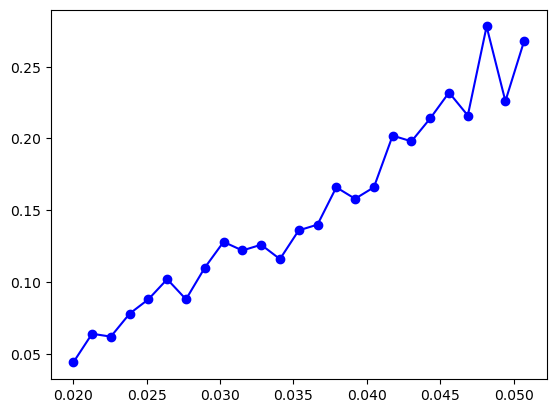

In [178]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()
# Plot the lines
ax.plot(p_x, pymatch_errrate_5, label='Toric 5x5', color='blue', marker='o')
ax.plot(p_x, pymatch_errrate_11, label='Toric 11x11', color='green', marker='o')
ax.plot(p_x, pymatch_errrate_17, label='Toric 17x17', color='red', marker='o')
ax.plot(p_x, pymatch_errrate_23, label='y = 23x23', color='orange', marker='o')

# Add a title and labels
# ax.set_title('Multiple Line Chart Example')
ax.set_xlabel('Physical Error Rate(Depolarizing Noise Model)')
ax.set_ylabel('Logical Failure Rate')

# Add a legend
ax.legend()

# Show the plot
plt.show()
